In [78]:
import pandas as pd
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
df = pd.read_csv(url)

In [65]:
#Dimnesion of the dataset (Rows and columns)
print(df.shape)

(4008, 11)


In [66]:
#Data types
print(df.dtypes)

Customer                      object
ST                            object
GENDER                        object
Education                     object
Customer Lifetime Value       object
Income                       float64
Monthly Premium Auto         float64
Number of Open Complaints     object
Policy Type                   object
Vehicle Class                 object
Total Claim Amount           float64
dtype: object


In [67]:
df['Customer'].unique()

array(['RB50392', 'QZ44356', 'AI49188', ..., 'CW49887', 'MY31220', nan],
      dtype=object)

In [68]:
df['Income'].unique()

array([    0., 48767., 36357., 62902., 55350., 14072., 28812., 77026.,
       99845., 83689., 24599., 25049., 28855., 51148., 66140., 57749.,
       61040., 17870., 97541., 29723., 86584., 75690., 23158., 65999.,
       37260., 68987., 42305., 65706., 53243., 50071., 60021., 43244.,
       46896., 10105., 23218., 24804., 33190., 36014., 67163., 16701.,
       46623., 64749., 16969., 11621., 17622., 11489., 66525., 33663.,
       22547., 61486., 29879., 93011., 65186., 26840., 75644., 38984.,
       71811., 20961., 41275., 61321., 51066., 34378., 43072., 25222.,
       77552., 23091., 48269., 32720., 20396., 21513., 80744., 52822.,
       69738., 17780., 18107., 57740., 32627., 65795., 60475., 41837.,
       32303., 40531., 79898., 56398., 71600., 27804., 45506., 99428.,
       20993., 37839., 92711., 74665., 61108., 46833., 88768., 28262.,
       33555., 42780., 58850., 21880., 25251., 25317., 24188., 41611.,
       28406., 69833., 80536., 88891., 97732., 61222., 50335., 82210.,
      

In [69]:
#unique values and categorical columns
print(df.nunique())
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print('Categorical columns identified:' , categorical_columns)

#unique vales for each categorical colum
for col in categorical_columns:
    print(f"nUnique values in '{col}':")
    print(df[col].unique())

#for numerical columns
numerical_columns = df.select_dtypes(include='number')   
print(numerical_columns.agg(['min', 'max'])) 

Customer                     1071
ST                              8
GENDER                          5
Education                       6
Customer Lifetime Value      1027
Income                        774
Monthly Premium Auto          132
Number of Open Complaints       6
Policy Type                     3
Vehicle Class                   6
Total Claim Amount            761
dtype: int64
Categorical columns identified: ['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value', 'Number of Open Complaints', 'Policy Type', 'Vehicle Class']
nUnique values in 'Customer':
['RB50392' 'QZ44356' 'AI49188' ... 'CW49887' 'MY31220' nan]
nUnique values in 'ST':
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' 'Cali' 'AZ' 'WA'
 nan]
nUnique values in 'GENDER':
[nan 'F' 'M' 'Femal' 'Male' 'female']
nUnique values in 'Education':
['Master' 'Bachelor' 'High School or Below' 'College' 'Bachelors' 'Doctor'
 nan]
nUnique values in 'Customer Lifetime Value':
[nan '697953.59%' '1288743.17%' ... 

In [70]:
#summary statistics for numerical columns
print(numerical_columns.describe())

             Income  Monthly Premium Auto  Total Claim Amount
count   1071.000000           1071.000000         1071.000000
mean   39295.701214            193.234360          404.986909
std    30469.427060           1601.190369          293.027260
min        0.000000             61.000000            0.382107
25%    14072.000000             68.000000          202.157702
50%    36234.000000             83.000000          354.729129
75%    64631.000000            109.500000          532.800000
max    99960.000000          35354.000000         2893.239678


In [71]:
numerical_stats = df.describe(include='number').T
numerical_stats['median'] = df.median(numeric_only=True)
numerical_stats['mode'] = df.mode(numeric_only=True).iloc[0]
numerical_stats['std_dev'] = df.std(numeric_only=True)

#quartile informations using qcut
for col in df.select_dtypes(include='number').columns:
    df[f'{col}_quartile'] = pd.qcut(df[col], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

print('Numerical Summary statistics with quartile bins:')
print(numerical_stats.head())
print('Sample of quatile bins:')   
print(df[[col for col in df.columns if 'quartile' in col]].head())

Numerical Summary statistics with quartile bins:
                       count          mean           std        min  \
Income                1071.0  39295.701214  30469.427060   0.000000   
Monthly Premium Auto  1071.0    193.234360   1601.190369  61.000000   
Total Claim Amount    1071.0    404.986909    293.027260   0.382107   

                               25%           50%      75%           max  \
Income                14072.000000  36234.000000  64631.0  99960.000000   
Monthly Premium Auto     68.000000     83.000000    109.5  35354.000000   
Total Claim Amount      202.157702    354.729129    532.8   2893.239678   

                            median   mode       std_dev  
Income                36234.000000    0.0  30469.427060  
Monthly Premium Auto     83.000000   65.0   1601.190369  
Total Claim Amount      354.729129  321.6    293.027260  
Sample of quatile bins:
  Income_quartile Monthly Premium Auto_quartile Total Claim Amount_quartile
0              Q1                

In [72]:
df.info

<bound method DataFrame.info of      Customer          ST GENDER             Education  \
0     RB50392  Washington    NaN                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   
...       ...         ...    ...                   ...   
4003      NaN         NaN    NaN                   NaN   
4004      NaN         NaN    NaN                   NaN   
4005      NaN         NaN    NaN                   NaN   
4006      NaN         NaN    NaN                   NaN   
4007      NaN         NaN    NaN                   NaN   

     Customer Lifetime Value   Income  Monthly Premium Auto  \
0                        NaN      0.0                1000.0   
1                 697953.59%      0.0                  94.0   
2                1288743.17%  48767.0                 108.0   
3                 7

In [73]:
#challenge 2: Analyzing the data
#exercise 1
state_counts = df['ST'].value_counts()
top_5_less_common_states = state_counts.nsmallest(5)
print(top_5_less_common_states)

ST
AZ             25
WA             30
Washington     81
Nevada         98
Cali          120
Name: count, dtype: int64


In [74]:
#Exercise 2
policy_counts = df['Policy Type'].value_counts()
most_sold_policy_types = policy_counts.idxmax()
print(policy_counts)
print('Policy type with the highest number of policies sold:')
print(most_sold_policy_types)

Policy Type
Personal Auto     780
Corporate Auto    234
Special Auto       57
Name: count, dtype: int64
Policy type with the highest number of policies sold:
Personal Auto


In [75]:
#exercise 3
personal_auto_df = df.loc[df['Policy Type'] == 'Personal Auto']
corporate_auto_df = df.loc[df['Policy Type'] == 'Corporate Auto']
personal_auto_avg_income = personal_auto_df['Income'].mean()
corporate_auto_avg_income = corporate_auto_df['Income'].mean()
print(f'Average Income (Personal auto): ${personal_auto_avg_income:.2f}')
print(f'Average Income (Corporate auto): ${corporate_auto_avg_income:.2f}')


Average Income (Personal auto): $38180.70
Average Income (Corporate auto): $41390.31


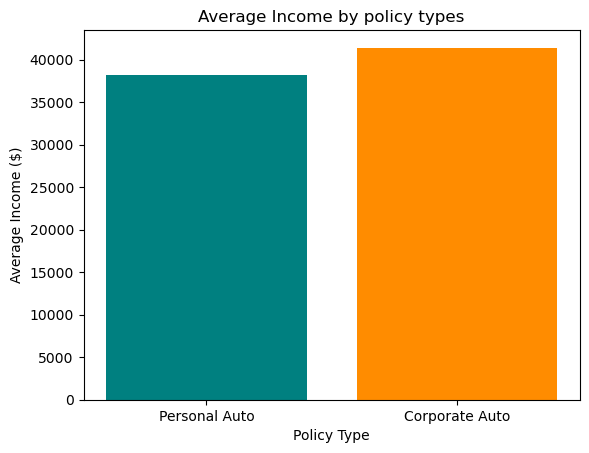

In [76]:
#bar chart just practising 
import matplotlib.pyplot as plt

policy_types = ['Personal Auto', 'Corporate Auto']
avg_incomes = [personal_auto_avg_income, corporate_auto_avg_income]

plt.bar(policy_types, avg_incomes, color=['teal', 'darkorange'])
plt.title('Average Income by policy types')
plt.xlabel('Policy Type')
plt.ylabel('Average Income ($)')
plt.show()

In [81]:
#exercise 4
print(df['Total Claim Amount'].describe())


count    1071.000000
mean      404.986909
std       293.027260
min         0.382107
25%       202.157702
50%       354.729129
75%       532.800000
max      2893.239678
Name: Total Claim Amount, dtype: float64


In [82]:
#calculate the 75th for total claim amount
top_25_percentile = df['Total Claim Amount'].quantile(0.75)
print(f'75th Percentile (Tpo 25% Threshold): ${top_25_percentile:.2f}')

75th Percentile (Tpo 25% Threshold): $532.80


In [84]:
#dataframe for high claim customers
high_claims_df = df[df['Total Claim Amount'] > top_25_percentile]
#Summary statistics for high claim 
print(high_claims_df.describe())

             Income  Monthly Premium Auto  Total Claim Amount
count    264.000000            264.000000          264.000000
mean   23677.344697            165.193182          782.228263
std    27013.483721            623.930992          292.751640
min        0.000000             63.000000          537.600000
25%        0.000000             99.000000          606.521741
50%    18807.000000            114.000000          679.597985
75%    42423.750000            133.250000          851.400000
max    99316.000000          10202.000000         2893.239678
